R => Python  
Source: https://web.stanford.edu/class/stats191/notebooks/Simple_diagnostics.html

# Diagnostics for simple linear regression

* Goodness of fit of regression: analysis of variance.

* $F$-statistics.

* Residuals.

* Diagnostic plots.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy import stats

### A synthetic dataset

In [2]:
X = np.arange(0, 21) # 0 ~ 20
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [3]:
Y = 0.5 * X + 1 + np.random.normal(size=21)
Y

array([ -0.2750688 ,   1.64894491,   2.16793487,   0.28505053,
         1.0924421 ,   4.19172022,   4.12570059,   3.8942082 ,
         4.99132642,   5.59358392,   5.04143322,   7.33728569,
         6.59410052,   8.51285701,   7.13469736,   9.14972658,
         9.38115689,   8.62142743,  10.56971325,  10.70522352,  11.43417118])

In [4]:
X = sm.add_constant(X)
X[:5,:]

array([[ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.]])

In [5]:
res = sm.OLS(Y, X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     342.8
Date:                Fri, 07 Jun 2019   Prob (F-statistic):           1.29e-13
Time:                        07:10:22   Log-Likelihood:                -24.987
No. Observations:                  21   AIC:                             53.97
Df Residuals:                      19   BIC:                             56.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.2406      0.352      0.683      0.503        -0.497     0.978
x1             0.5578      0.030     18.514      0.000         0.495     0.621
==============================================================================
Omnibus:                        1.556   Durbin-Watson:                   2.508
Prob(Omnibus):                  0.459   Jarque-Bera (JB):                1.282
Skew:                          -0.440   Prob(JB):                        0.527
Kurtosis:                       2.168   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
y_mean = np.mean(Y)
y_mean

5.8189350286331569

In [7]:
y_hat = res.predict()
y_hat

array([  0.24060676,   0.79843959,   1.35627242,   1.91410524,
         2.47193807,   3.0297709 ,   3.58760372,   4.14543655,
         4.70326938,   5.2611022 ,   5.81893503,   6.37676786,
         6.93460068,   7.49243351,   8.05026634,   8.60809916,
         9.16593199,   9.72376481,  10.28159764,  10.83943047,  11.39726329])

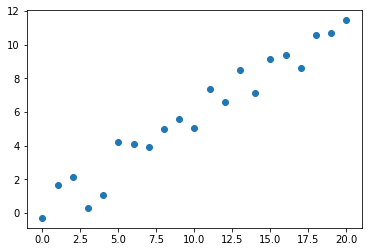

In [8]:
plt.scatter(X[:,1], Y) # not the constant
plt.show()

In [9]:
y_means = np.repeat(y_mean,len(Y))

SST: Total sum of squares

In [10]:
np.vstack((X[:,1], X[:,1]))

array([[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.],
       [  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.]])

In [11]:
np.vstack((Y,y_means))

array([[ -0.2750688 ,   1.64894491,   2.16793487,   0.28505053,
          1.0924421 ,   4.19172022,   4.12570059,   3.8942082 ,
          4.99132642,   5.59358392,   5.04143322,   7.33728569,
          6.59410052,   8.51285701,   7.13469736,   9.14972658,
          9.38115689,   8.62142743,  10.56971325,  10.70522352,
         11.43417118],
       [  5.81893503,   5.81893503,   5.81893503,   5.81893503,
          5.81893503,   5.81893503,   5.81893503,   5.81893503,
          5.81893503,   5.81893503,   5.81893503,   5.81893503,
          5.81893503,   5.81893503,   5.81893503,   5.81893503,
          5.81893503,   5.81893503,   5.81893503,   5.81893503,
          5.81893503]])

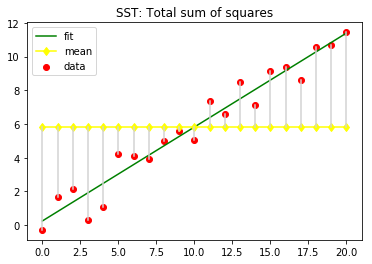

In [12]:
plt.scatter(X[:,1], Y, color='red', label='data')
plt.plot(X[:,1], y_hat, color='green',label='fit')
plt.plot(X[:,1], y_means, color='yellow',marker='d',label='mean')

plt.plot(np.vstack((X[:,1], X[:,1])), 
         np.vstack((Y,y_means)),
         color='lightgray',
         linestyle='-' )

plt.title('SST: Total sum of squares')
plt.legend()
plt.show()

SSE: Error sum of squares

In [13]:
np.vstack((Y,y_hat))

array([[ -0.2750688 ,   1.64894491,   2.16793487,   0.28505053,
          1.0924421 ,   4.19172022,   4.12570059,   3.8942082 ,
          4.99132642,   5.59358392,   5.04143322,   7.33728569,
          6.59410052,   8.51285701,   7.13469736,   9.14972658,
          9.38115689,   8.62142743,  10.56971325,  10.70522352,
         11.43417118],
       [  0.24060676,   0.79843959,   1.35627242,   1.91410524,
          2.47193807,   3.0297709 ,   3.58760372,   4.14543655,
          4.70326938,   5.2611022 ,   5.81893503,   6.37676786,
          6.93460068,   7.49243351,   8.05026634,   8.60809916,
          9.16593199,   9.72376481,  10.28159764,  10.83943047,
         11.39726329]])

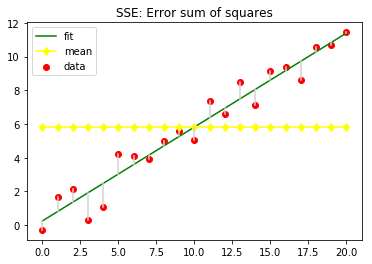

In [14]:
plt.scatter(X[:,1], Y, color='red', label='data')
plt.plot(X[:,1], y_hat, color='green',label='fit')
plt.plot(X[:,1], y_means, color='yellow',marker='d',label='mean')

plt.plot(np.vstack((X[:,1], X[:,1])), 
         np.vstack((Y,y_hat)),
         color='lightgray',
         linestyle='-' )

plt.title('SSE: Error sum of squares')
plt.legend()
plt.show()

SSR: Regression sum of squares

In [15]:
np.vstack((y_means, y_hat))

array([[  5.81893503,   5.81893503,   5.81893503,   5.81893503,
          5.81893503,   5.81893503,   5.81893503,   5.81893503,
          5.81893503,   5.81893503,   5.81893503,   5.81893503,
          5.81893503,   5.81893503,   5.81893503,   5.81893503,
          5.81893503,   5.81893503,   5.81893503,   5.81893503,
          5.81893503],
       [  0.24060676,   0.79843959,   1.35627242,   1.91410524,
          2.47193807,   3.0297709 ,   3.58760372,   4.14543655,
          4.70326938,   5.2611022 ,   5.81893503,   6.37676786,
          6.93460068,   7.49243351,   8.05026634,   8.60809916,
          9.16593199,   9.72376481,  10.28159764,  10.83943047,
         11.39726329]])

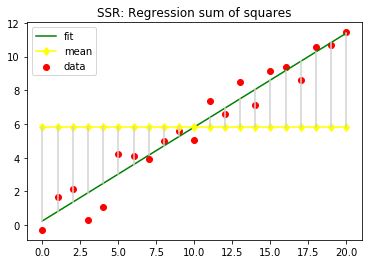

In [16]:
plt.scatter(X[:,1], Y, color='red', label='data')
plt.plot(X[:,1], y_hat, color='green',label='fit')
plt.plot(X[:,1], y_means, color='yellow',marker='d',label='mean')

plt.plot(np.vstack((X[:,1], X[:,1])), 
         np.vstack((y_means, y_hat)),
         color='lightgray',
         linestyle='-' )

plt.title('SSR: Regression sum of squares')
plt.legend()
plt.show()

## Definition of $R^2$

As noted above, if the regression model fits very well, then $SSR$ will be
large relative to $SST$. The $R^2$ score is just the
ratio of these sums of squares.  

We'll verify this on the `wages` data.

In [17]:
url = "http://stats191.stanford.edu/data/wage.csv"
data = pd.read_csv(url)
data.head()

,education,logwage
0,16.750000,2.845000
1,15.000000,2.446667
2,10.000000,1.560000
3,12.666667,2.099167
4,15.000000,2.490000


In [18]:
formula = "logwage ~ education"
wages_res = ols(formula, data=data).fit()
wages_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logwage   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     340.0
Date:                Fri, 07 Jun 2019   Prob (F-statistic):           1.15e-70
Time:                        07:10:24   Log-Likelihood:                -1114.3
No. Observations:                2178   AIC:                             2233.
Df Residuals:                    2176   BIC:                             2244.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.2392      0.055     22.541      0.000         1.131     1.347
education      0.0786      0.004     18.440      0.000         0.070     0.087
==============================================================================
Omnibus:                       46.662   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.725
Skew:                          -0.269   Prob(JB):                     1.07e-13
Kurtosis:                       3.606   Cond. No.                         82.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
wages_y = data["logwage"]
wages_y_mean = np.mean(data["logwage"])
wages_y_hat  = wages_res.predict()

SST = np.sum(((wages_y - wages_y_mean)**2))
SSE = np.sum((wages_res.resid**2))
SSR = np.sum(((wages_y_mean - wages_y_hat)**2))
print("SST      :", SST)
print("SSE + SSR:", (SSE + SSR))

SST      : 410.2148277475003
SSE + SSR: 410.214827748


The $R^2$ is also closely related to the $F$ statistic
reported as the goodness of fit in *summary* of *lm*.

The ratio $$
   F=\frac{SSR/1}{SSE/(n-2)} = \frac{(SST-SSE)/1}{SSE/(n-2)} = \frac{MSR}{MSE}$$  
   can be thought of as a *ratio of a difference in sums of squares normalized by our "best estimate" of variance*

In [20]:
F = (SSR/1) / (SSE/wages_res.df_resid)
F

340.02969187007642

In [21]:
wages_res.df_resid

2176.0

In [22]:
wages_res.rsquared

0.13514534147541912

In other words, for simple linear regression that `F-statistic` is
$$
F = \frac{(n-2) \cdot R^2}{1-R^2}
$$
where $n-2$ is `wages_res.df_resid`.

In [23]:
(wages_res.df_resid * wages_res.rsquared) / (1 - wages_res.rsquared)

340.02969187007483

Finally,  $R=\sqrt{R^2}$ is called the (absolute) *correlation coefficient* because it is equal to the absolute value of sample correlation coefficient of $X$ and $Y$.

In [24]:
data.corr()

,education,logwage
education,1.000000,0.367621
logwage,0.367621,1.000000


In [25]:
(data.corr()["logwage"]["education"])**2

0.13514534147541943

In [26]:
(data.corr()["education"]["logwage"])**2 #symmetric

0.13514534147541943

## $F$-statistics

The $F$ statistic should compare two models. What are these models?

* The *full model* would be
$$
(FM) \qquad  Y_i = \beta_0 + \beta_1 X_i + \varepsilon_i 
$$

* The *reduced model* would be
$$
(RM) \qquad  Y_i = \beta_0 + \varepsilon_i 
$$

* The $F$-statistic then has the form
$$
F=\frac{(SSE(RM) - SSE(FM)) / (df_{RM} - df_{FM})}{SSE(FM) / df_{FM}}
$$


* The *null hypothesis* is 
$$
H_0: \text{reduced model (RM) is correct}.
$$

* The usual $\alpha$ rejection rule would be to reject $H_0$ if the $F_{\text{obs}}$ the  observed $F$ statistic is greater than
$F_{1,n-2,1-\alpha}$. 

* In our case, the observed $F$ was 340, $n-2=2176$ and the appropriate 5% threshold is computed below to be 3.85. Therefore, we strongly
reject $H_0$.


In [27]:
stats.f.ppf(0.95, 1, 2176)

3.8457358464718414

## Diagnostics for simple linear regression

* Using a linear regression function can be wrong: maybe regression function should be quadratic.

* We assumed independent Gaussian errors with the same variance. This may be incorrect.
    - The errors may not be normally distributed.
    - The errors may not be independent.
    - The errors may not have the same variance.
    
* Detecting problems is more *art* then *science*, i.e.
   we cannot *test* for all possible problems in a regression model.
   
The basic idea of most diagnostic measures is the following.  
*If the model is correct then
   residuals $e_i = Y_i -\widehat{Y}_i, 1 \leq i \leq n$ should look like a sample of
   (not quite independent) $N(0, \sigma^2)$ random variables.*

### A poorly fitting model

Here is an example of a poorly fitting model. It will turn out that there is a simple fix for this dataset: a model that
includes a quadratic term for $X$ will turn out to have a much better fit. Finding this
fix in practice can be difficult.

In [28]:
url = 'http://web.stanford.edu/class/stats191/data/anscombe.table'
data = pd.read_table(url, sep='\t')
data.head()

,Y1,X1,Y2,X2,Y3,X3,Y4,X4
0,8.04,10,9.14,10,7.46,10,6.58,8
1,6.95,8,8.14,8,6.77,8,5.76,8
2,7.58,13,8.74,13,12.74,13,7.71,8
3,8.81,9,8.77,9,7.11,9,8.84,8
4,8.33,11,9.26,11,7.81,11,8.47,8


In [29]:
data=data.sort_values('X2')
data=data.reset_index(drop=True)
e = np.random.normal(size=len(data.Y2))
y = data.Y2 + e
x = data.X2

In [30]:
y

0     2.626953
1     4.375261
2     6.261422
3     7.684208
4     7.971963
5     9.447670
6     9.785857
7     9.248356
8     7.972022
9     9.243689
10    7.172918
Name: Y2, dtype: float64

In [31]:
x

0      4
1      5
2      6
3      7
4      8
5      9
6     10
7     11
8     12
9     13
10    14
Name: X2, dtype: int64

In [32]:
x = sm.add_constant(x) 

In [33]:
ols_model = sm.OLS(y, x)
res_ols = ols_model.fit()
print(res_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y2   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     8.648
Date:                Fri, 07 Jun 2019   Prob (F-statistic):             0.0165
Time:                        07:10:25   Log-Likelihood:                -20.309
No. Observations:                  11   AIC:                             44.62
Df Residuals:                       9   BIC:                             45.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.1582      1.542      2.049      0.0

/home/doojung/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


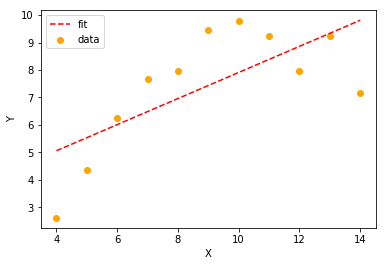

In [34]:
plt.scatter(x.X2, y, marker='o',label='data', color='orange')
plt.gca().set_xlabel('X')
plt.gca().set_ylabel('Y')
y_pred = res_ols.predict()

plt.plot(x.X2, y_pred, '--', color = 'red',label='fit')
plt.legend()
plt.show()

Let's take a look at the residuals from this model. Patterns in these residual plots may suggest something like a quadratic effect is missing, but they can also suggest some sort of serial dependence in the random errors. We will discuss this later, when we discuss correlated-errors.


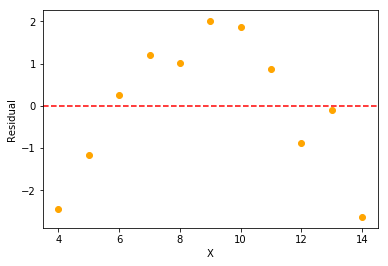

In [35]:
plt.scatter(x.X2, res_ols.resid, marker='o',label='data', color='orange')
plt.axhline(0, color='red', linestyle='--')

plt.gca().set_ylabel('Residual')
plt.gca().set_xlabel('X')

plt.show()

We will add a quadratic term to our model. This is our first example of a *multiple linear regression model*.


In [36]:
x["X2^2"] = data.X2**2
x

,const,X2,X2^2
0,1,4,16
1,1,5,25
2,1,6,36
3,1,7,49
4,1,8,64
5,1,9,81
6,1,10,100
7,1,11,121
8,1,12,144
9,1,13,169


In [37]:
quad_ols_model = sm.OLS(y, x)
res_quad_ols = quad_ols_model.fit()
print(res_quad_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y2   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     75.58
Date:                Fri, 07 Jun 2019   Prob (F-statistic):           6.38e-06
Time:                        07:10:26   Log-Likelihood:                -7.5653
No. Observations:                  11   AIC:                             21.13
Df Residuals:                       8   BIC:                             22.32
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -8.5439      1.461     -5.847      0.0

/home/doojung/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


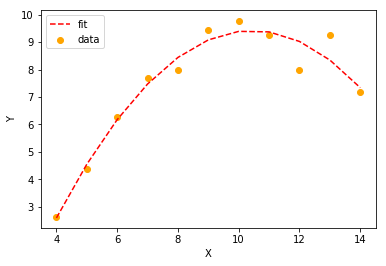

In [38]:
plt.scatter(x.X2, y, marker='o',label='data', color='orange')
plt.gca().set_xlabel('X')
plt.gca().set_ylabel('Y')
quad_y_pred = res_quad_ols.predict()

plt.plot(x.X2, quad_y_pred, '--', color = 'red',label='fit')
plt.legend()
plt.show()

The residuals of the quadratic model have no apparent pattern in them, suggesting this is a better fit than the simple linear regression model.


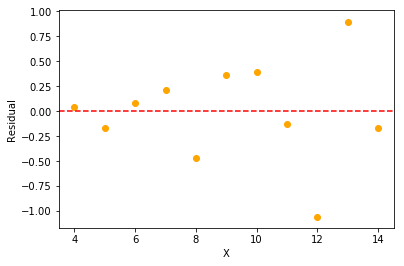

In [39]:
plt.scatter(x.X2, res_quad_ols.resid, marker='o',label='data', color='orange')
plt.axhline(0,color='red', linestyle='--')

plt.gca().set_ylabel('Residual')
plt.gca().set_xlabel('X')

plt.show()

### Assessing normality of errors

Another common diagnostic plot is the *qqplot* where *qq* stands for *Quantile-Quantile*. Roughly speaking, a qqplot is designed to see if the quantiles of two distributions match. 

* The function *qqnorm* can be used to ascertain if a sample of numbers are roughly normally distributed. If the points lie on the diagonal line, this is evidence that the sample is normally distributed. Various departures from the diagonal indicate skewness, asymmetry, etc.

* If $e_i, 1\leq i \leq n$ were really a sample of
$N(0, \sigma^2)$ then their sample quantiles should be close to the
sample quantiles of the $N(0, \sigma^2)$ distribution.

The $qqnorm$ plot is a plot of
   $$
   e_{(i)}  \ {\rm vs.} \  \mathbb{E}(\varepsilon_{(i)}), \qquad 1 \leq i \leq n.$$
   where $e_{(i)}$ is the $i$-th smallest residual (order statistic) and
   $\mathbb{E}(\varepsilon_{(i)})$ is the expected value for independent $\varepsilon_i$'s $\sim N(0,\sigma^2)$.


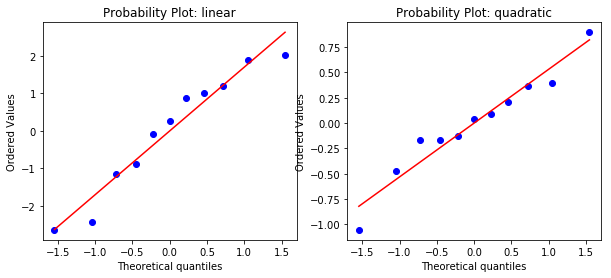

In [40]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(10)

stats.probplot(res_ols.resid,      plot=axs[0])
stats.probplot(res_quad_ols.resid, plot=axs[1])

axs[0].set_title(axs[0].get_title() + ': linear' )
axs[1].set_title(axs[1].get_title() + ': quadratic' )

plt.show()

In these two examples, the qqplot does not seem vastly different, even though we know the simple model is incorrect in this case. This indicates that several diagnostic tools can be useful in assessing a model.

### Assessing constant variance assumption

One plot that is sometimes used to determine whether the variance is constant or not is a plot of 
$X$ against $e=Y-\hat{Y}$. If there is a pattern to the spread in this plot, it may indicate that the variance
changes as a function of $X$. In our earlier plots, we noticed a trend in this plot, not necessarily
evidence of changing variance.

The dataset below, taken from some work done with Dr. Robert Shafer here at Stanford http://hivdb.stanford.edu, plots HIV virus load against a score related to the the genetic makeup of a patientâ€™s virus shows clear non-constant variance. It also provides a clear example of an outlier, or a point that is a clear departure from the model.


In [41]:
url = 'http://stats191.stanford.edu/data/HIV.VL.table'
data = pd.read_table(url, sep=' ')
data.head()

,GSS,VL
0,4.0,40406
1,13.4,2603
2,7.4,55246
3,2.7,22257
4,13.5,400


In [42]:
formula = "VL ~ GSS"
hiv_res = ols(formula, data=data).fit()
hiv_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     VL   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.7357
Date:                Fri, 07 Jun 2019   Prob (F-statistic):              0.396
Time:                        07:10:27   Log-Likelihood:                -574.33
No. Observations:                  47   AIC:                             1153.
Df Residuals:                      45   BIC:                             1156.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.352e+04   1.72e+04      0.786      0.436     -2.11e+04  4.82e+04
GSS         1691.0926   1971.565      0.858      0.396     -2279.843  5662.028
==============================================================================
Omnibus:                       75.489   Durbin-Watson:                   2.248
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              958.473
Skew:                           4.174   Prob(JB):                    7.42e-209
Kurtosis:                      23.488   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

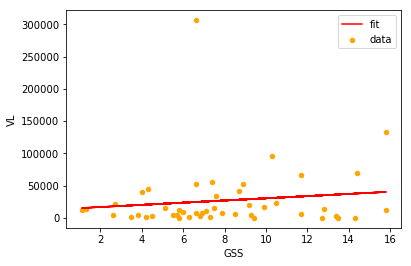

In [43]:
ax=data.plot.scatter(x='GSS',y='VL',label='data', color='orange')
ax.plot(data.GSS, hiv_res.predict(),color='red',label='fit')

ax.legend()
plt.show()

In [44]:
subset_idx = data.VL < 200000
formula = "VL ~ GSS"

hiv_res_sub = ols(formula, data=data[subset_idx]).fit()
hiv_res_sub.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     VL   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     4.588
Date:                Fri, 07 Jun 2019   Prob (F-statistic):             0.0378
Time:                        07:10:28   Log-Likelihood:                -533.49
No. Observations:                  46   AIC:                             1071.
Df Residuals:                      44   BIC:                             1075.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2801.5167   9296.119      0.301      0.765     -1.59e+04  2.15e+04
GSS         2270.9411   1060.225      2.142      0.038       134.198  4407.684
==============================================================================
Omnibus:                       20.332   Durbin-Watson:                   2.288
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.927
Skew:                           1.473   Prob(JB):                     8.63e-07
Kurtosis:                       5.428   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

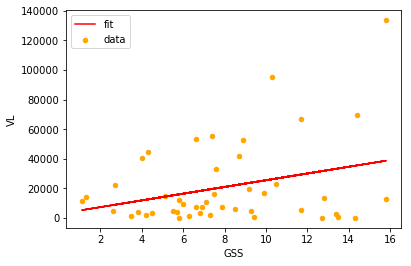

In [45]:
ax=data[subset_idx].plot.scatter(x='GSS',y='VL',label='data', color='orange')
ax.plot(data[subset_idx].GSS, hiv_res_sub.predict(),color='red',label='fit')

ax.legend()
plt.show()

When we plot the residuals against the fitted values for this model (even with the outlier removed) we see that the variance
clearly depends on $GSS$. They also do not seem symmetric around 0 so perhaps the Gaussian model is not appropriate.


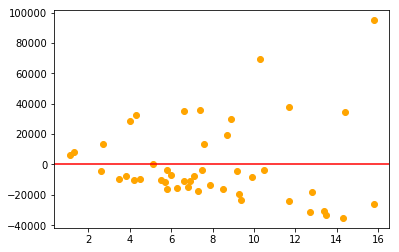

In [46]:
plt.scatter(data.GSS[subset_idx], hiv_res_sub.resid, color='orange')
plt.axhline(0,color='red')

ax.legend()
plt.show()